In [1]:
import os

currentDir = os.getcwd()
print("Current dir:", currentDir)

Current dir: /home/mlgmag/Documents/Uni/ML/lab1


In [2]:
import csv

# Read data set

def readDataSet(fileName):
    vectorX = [];
    vectorY = [];
    
    with open(fileName, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            vectorX.append(float(row["x"]))
            vectorY.append(float(row["y"]))

    dataSet = {
        "x": vectorX,
        "y": vectorY
    }
    
    return dataSet

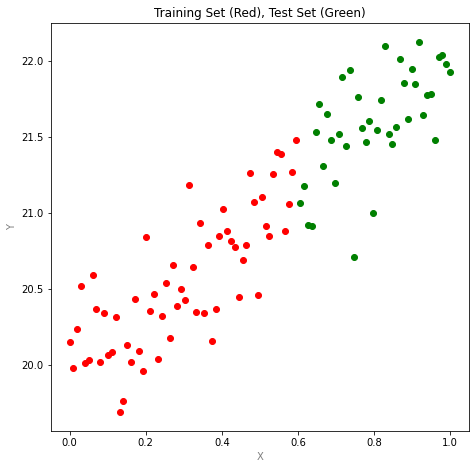

In [3]:
import matplotlib.pyplot as plt

# Visualize data sets on the same plot

fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

plt.xlabel('X', color='gray')
plt.ylabel('Y', color='gray')

trainingSet = readDataSet('lab_1_train.csv')
testSet = readDataSet('lab_1_test.csv')

plt.title('Training Set (Red), Test Set (Green)')
plt.plot(trainingSet["x"], trainingSet["y"], 'ro', testSet["x"], testSet["y"], 'go')
plt.show()

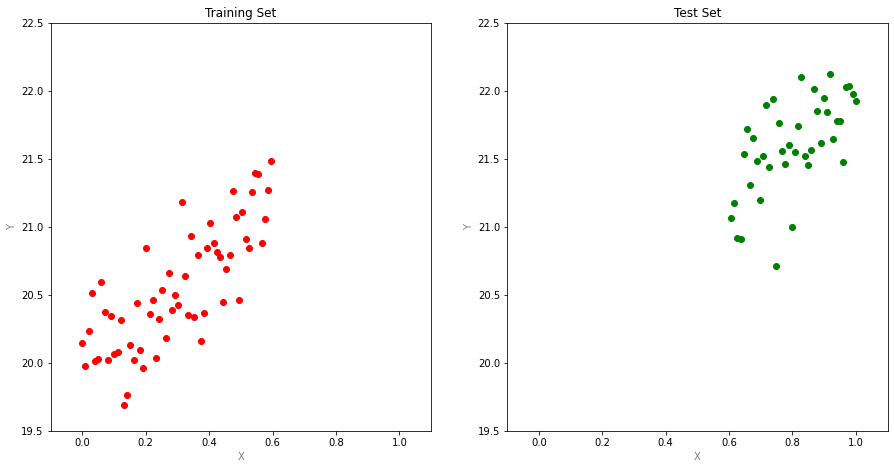

In [4]:
import matplotlib.pyplot as plt

# Visualize data sets on the separate plots

fig = plt.gcf()
fig.set_size_inches(15, 7.5)

trainingSet = readDataSet('lab_1_train.csv')
plt.subplot(1, 2, 1)
plt.xlabel('X', color='gray')
plt.ylabel('Y', color='gray')
plt.axis([-0.1, 1.1, 19.5, 22.5])
plt.title('Training Set')
plt.plot(trainingSet["x"], trainingSet["y"], 'ro')

testSet = readDataSet('lab_1_test.csv')
plt.subplot(1, 2, 2)
plt.xlabel('X', color='gray')
plt.ylabel('Y', color='gray')
plt.axis([-0.1, 1.1, 19.5, 22.5])
plt.title('Test Set')
plt.plot(testSet["x"], testSet["y"], 'go')

plt.show()

In [5]:
import numpy as np

def regressionLine(b0, b1, x):
    return b0 + b1 * x

def calculateLoss(b0, b1, dataSet):
    xValues = dataSet["x"]
    
    predictedVector = [regressionLine(b0, b1, xValue) for xValue in xValues]
    
    lossVector = []
    yValues = dataSet["y"]
    
    lossVector = [(expected - predicted)**2 for (expected, predicted) in zip(yValues, predictedVector)]
    
    loss = 1/len(xValues) * np.sum(lossVector)
    
    return loss


In [6]:
trainingSet = readDataSet('lab_1_train.csv')

loss = calculateLoss(1, 1, trainingSet)
print("Loss for b0->'1' and b1->'1':",loss)

Loss for b0->'1' and b1->'1': 370.7258142123134


In [7]:
def calculateMinParamsCustomImpl(inputParams):
    tolerance = inputParams["tolerance"]
    step = inputParams["step"]
    dataSet = inputParams["dataSet"]
    
    b0 = 0
    b1 = 0
    
    iterationCount = 0
    currentLoss = calculateLoss(b0, b1, dataSet)
    diff = currentLoss;
    while diff > tolerance:
        tempDict = {
            "k1": {
                "b0": b0 + step,
                "b1": b1
            },
            "k2": {
                "b0": b0 - step,
                "b1": b1
            },
            "k3": {
                "b0": b0,
                "b1": b1 + step 
            },
            "k4": {
                "b0": b0,
                "b1": b1 - step
            },
            "k5": {
                "b0": b0 + step,
                "b1": b1 + step
            },
            "k6": {
                "b0": b0 - step,
                "b1": b1 - step
            },
            "k7": {
                "b0": b0 + step,
                "b1": b1 - step
            },
            "k8": {
                "b0": b0 - step,
                "b1": b1 + step
            }
        }
        
        k1 = calculateLoss(b0 + step, b1, dataSet)
        k2 = calculateLoss(b0 - step, b1, dataSet)
        k3 = calculateLoss(b0, b1 + step, dataSet)
        k4 = calculateLoss(b0, b1 - step, dataSet)
        k5 = calculateLoss(b0 + step, b1 + step, dataSet)
        k6 = calculateLoss(b0 - step, b1 - step, dataSet)
        k7 = calculateLoss(b0 + step, b1 - step, dataSet)
        k8 = calculateLoss(b0 - step, b1 + step, dataSet)

        kMin = np.min([k1, k2, k3, k4, k5, k6, k7, k8])
        
        if kMin < currentLoss:
            diff = currentLoss - kMin
            currentLoss = kMin
            
            value = tempDict["k1"]
            if kMin == k1:
                value = tempDict["k1"]
            elif kMin == k2:
                value = tempDict["k2"]
            elif kMin == k3:
                value = tempDict["k3"]
            elif kMin == k4:
                value = tempDict["k4"]
            elif kMin == k5:
                value = tempDict["k5"]
            elif kMin == k6:
                value = tempDict["k6"]
            elif kMin == k7:
                value = tempDict["k7"]
            else:
                value = tempDict["k8"]

            b0 = value["b0"]
            b1 = value["b1"]
        else:
#             print('Can not optimize more. Decrease step in 10 times..')
            step /= 10
        
        print(f'b0: {b0},\tb1: {b1},\tcurrentLoss: {currentLoss}')
        iterationCount += 1
    
    minParams = {
        "b0": b0,
        "b1": b1
    }
    
    print("Current loss", currentLoss)
    print("Tolerance", tolerance)
    print("Iteratrions:", iterationCount)
    return minParams

b0: 10,	b1: 10,	currentLoss: 59.343220905202806
b0: 20,	b1: 0,	currentLoss: 0.494874243269073
b0: 20,	b1: 0,	currentLoss: 0.494874243269073
b0: 20,	b1: 1.0,	currentLoss: 0.16564527608466098
b0: 20,	b1: 2.0,	currentLoss: 0.07520146687732635
b0: 20,	b1: 2.0,	currentLoss: 0.07520146687732635
b0: 20,	b1: 1.9,	currentLoss: 0.07350051568909126
b0: 20,	b1: 1.9,	currentLoss: 0.07350051568909126
b0: 19.99,	b1: 1.9,	currentLoss: 0.07326854718662788
b0: 19.979999999999997,	b1: 1.91,	currentLoss: 0.07318002856270654
b0: 19.979999999999997,	b1: 1.92,	currentLoss: 0.0731473569570461
b0: 19.969999999999995,	b1: 1.93,	currentLoss: 0.0731278074859323
b0: 19.969999999999995,	b1: 1.94,	currentLoss: 0.07308329695227134
b0: 19.969999999999995,	b1: 1.95,	currentLoss: 0.07306266493440824
b0: 19.969999999999995,	b1: 1.95,	currentLoss: 0.07306266493440824
b0: 19.968999999999994,	b1: 1.9509999999999998,	currentLoss: 0.07305932426135035
b0: 19.967999999999993,	b1: 1.9519999999999997,	currentLoss: 0.0730570304542

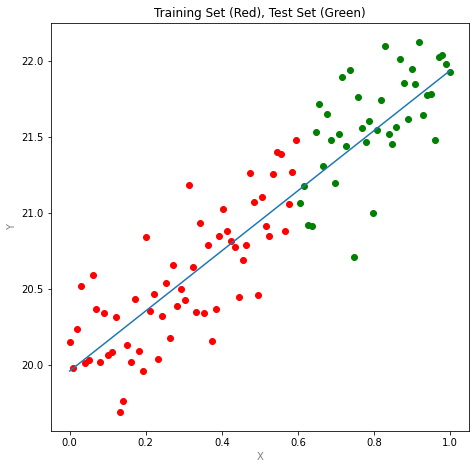

In [8]:
import matplotlib.pyplot as plt



# Find optimal params
trainingSet = readDataSet('lab_1_train.csv')
inputParams = {
    "step": 10,
    "tolerance": 1e-10,
    "dataSet": trainingSet
}
minParams = calculateMinParamsCustomImpl(inputParams)
print(f"Optimal params b0: {minParams['b0']}, b1: {minParams['b1']}")



# Visualize
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

plt.xlabel('X', color='gray')
plt.ylabel('Y', color='gray')

trainingSet = readDataSet('lab_1_train.csv')
testSet = readDataSet('lab_1_test.csv')
result = {
    "x": [0, 1],
    "y": [regressionLine(minParams['b0'], minParams['b1'], 0), regressionLine(minParams['b0'], minParams['b1'], 1)]
}

plt.title('Training Set (Red), Test Set (Green)')
plt.plot(trainingSet["x"], trainingSet["y"], 'ro', 
         testSet["x"], testSet["y"], 'go',
         result["x"], result["y"]
        )
plt.show()

In [9]:
def calculateMinParamsMathSolution(inputParams):
    dataSet = inputParams["dataSet"]
    xSet = dataSet["x"]
    ySet = dataSet["y"]

    xMean = np.mean(xSet)
    yMean = np.mean(ySet)

    b1 = np.sum((ySet - yMean) * xSet) / np.sum((xSet - xMean) * xSet) 
    b0 = yMean - b1 * xMean 
    loss = calculateLoss(b0, b1, dataSet)
    
    minParams = {
        "b0": b0,
        "b1": b1
    }
    
    print("Loss:", loss)
    return minParams

Loss: 0.07303506781751995
Optimal params b0: 19.959925250062053, b1: 1.9787849544631675


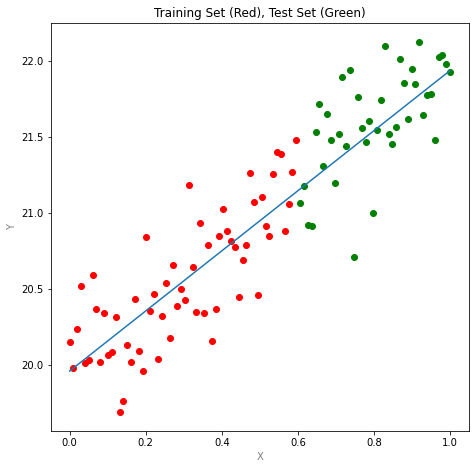

In [10]:
import numpy as np
import matplotlib.pyplot as plt



# Math solution
trainingSet = readDataSet('lab_1_train.csv')
inputParams = {
    "dataSet": trainingSet
}
minParams = calculateMinParamsMathSolution(inputParams)
print(f"Optimal params b0: {minParams['b0']}, b1: {minParams['b1']}")



# Visualize
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

plt.xlabel('X', color='gray')
plt.ylabel('Y', color='gray')

trainingSet = readDataSet('lab_1_train.csv')
testSet = readDataSet('lab_1_test.csv')
result = {
    "x": [0, 1],
    "y": [regressionLine(minParams['b0'], minParams['b1'], 0), regressionLine(minParams['b0'], minParams['b1'], 1)]
}

plt.title('Training Set (Red), Test Set (Green)')
plt.plot(trainingSet["x"], trainingSet["y"], 'ro', 
         testSet["x"], testSet["y"], 'go',
         result["x"], result["y"]
        )
plt.show()

In [11]:
def calculateMinParamsGradientDescent(inputParams):
    tolerance = inputParams["tolerance"]
    dataSet = inputParams["dataSet"]
    learningRate = inputParams["learningRate"]
    
    b0 = 0
    b1 = 0
    
    xValues = dataSet["x"]
    yValues = dataSet["y"]
    
    n = float(len(xValues))
    
    currentLoss = calculateLoss(b0, b1, dataSet)
    delta = currentLoss;

    iteration = 0
    while delta > tolerance:
        xValues = dataSet["x"]
        predictedVector = [regressionLine(b0, b1, xValue) for xValue in xValues]
        
        yDiffVector = [(expected - predicted) for (expected, predicted) in zip(yValues, predictedVector)]
        Db0 = (-2/n) * np.sum(yDiffVector)
        
        b1Temp = [(xValue * yDiff) for (xValue, yDiff) in zip(xValues, yDiffVector)]
        Db1 = (-2/n) * np.sum(b1Temp)
        
        b0 = b0 - learningRate * Db0
        b1 = b1 - learningRate * Db1
        
        print(f'b0: {b0},\tb1: {b1},\tcurrentLoss: {currentLoss}')
        delta = currentLoss - calculateLoss(b0, b1, dataSet)
        currentLoss = calculateLoss(b0, b1, dataSet)
        iteration += 1
    
    minParams = {
        "b0": b0,
        "b1": b1
    }
    
    print("Iteration:", iteration)
    print("Loss:", currentLoss)
    return minParams

b0: 0.41099126382076906,	b1: 0.12367813465364869,	currentLoss: 422.4774018848071
b0: 0.8130256306535505,	b1: 0.24461160240278607,	currentLoss: 404.2574249767672
b0: 1.2062985955438985,	b1: 0.3628603365917162,	currentLoss: 386.82412434421605
b0: 1.59100138645794,	b1: 0.4784829623813285,	currentLoss: 370.1435331252907
b0: 1.967321057420207,	b1: 0.5915368253029152,	currentLoss: 354.18315106962933
b0: 2.3354405796185445,	b1: 0.7020780191887422,	currentLoss: 338.911881213436
b0: 2.6955389305204642,	b1: 0.8101614134929777,	currentLoss: 324.29996928877193
b0: 3.0477911810443508,	b1: 0.9158406800162845,	currentLoss: 310.3189457490135
b0: 3.392368580827974,	b1: 1.019168319047094,	currentLoss: 296.9415702975205
b0: 3.7294386416358423,	b1: 1.120195684932291,	currentLoss: 284.1417788114293
b0: 4.059165218946015,	b1: 1.2189730110897676,	currentLoss: 271.89463255715407
b0: 4.381708591756117,	b1: 1.3155494344750247,	currentLoss: 260.17626959864884
b0: 4.697225540647417,	b1: 1.409973019513739,	current

b0: 19.050649102125295,	b1: 4.940345778744756,	currentLoss: 0.34244818529506804
b0: 19.051184919161543,	b1: 4.938692929509308,	currentLoss: 0.3421460275606816
b0: 19.051719870170693,	b1: 4.9370408337794744,	currentLoss: 0.34184421198469894
b0: 19.052253967982697,	b1: 4.935389494917167,	currentLoss: 0.34154273803824076
b0: 19.052787225150873,	b1: 4.9337389161998075,	currentLoss: 0.3412416051992912
b0: 19.05331965395794,	b1: 4.932089100822181,	currentLoss: 0.3409408129524209
b0: 19.053851266421923,	b1: 4.930440051898244,	currentLoss: 0.34064036078851956
b0: 19.05438207430193,	b1: 4.928791772462892,	currentLoss: 0.34034024820453884
b0: 19.0549120891038,	b1: 4.9271442654736965,	currentLoss: 0.3400404747032526
b0: 19.05544132208563,	b1: 4.925497533812596,	currentLoss: 0.3397410397930199
b0: 19.055969784263176,	b1: 4.923851580287554,	currentLoss: 0.3394419429875638
b0: 19.05649748641515,	b1: 4.922206407634179,	currentLoss: 0.3391431838057567
b0: 19.057024439088384,	b1: 4.920562018517311,	cur

b0: 19.373329709914845,	b1: 3.8921626584798528,	currentLoss: 0.1854609521077035
b0: 19.373658662683752,	b1: 3.8910896689175964,	currentLoss: 0.1853348944286362
b0: 19.37398743098154,	b1: 3.8900172810695692,	currentLoss: 0.1852089780919167
b0: 19.374316014911656,	b1: 3.8889454945983397,	currentLoss: 0.18508320293906486
b0: 19.374644414577496,	b1: 3.8878743091666665,	currentLoss: 0.18495756881177794
b0: 19.37497263008239,	b1: 3.886803724437497,	currentLoss: 0.18483207555193082
b0: 19.37530066152961,	b1: 3.8857337400739675,	currentLoss: 0.18470672300157603
b0: 19.375628509022377,	b1: 3.884664355739403,	currentLoss: 0.1845815110029427
b0: 19.375956172663848,	b1: 3.8835955710973185,	currentLoss: 0.18445643939843628
b0: 19.376283652557124,	b1: 3.8825273858114158,	currentLoss: 0.1843315080306409
b0: 19.376610948805247,	b1: 3.8814597995455866,	currentLoss: 0.18420671674231523
b0: 19.376938061511204,	b1: 3.8803928119639113,	currentLoss: 0.18408206537639513
b0: 19.377264990777924,	b1: 3.87932642

b0: 19.582052154928846,	b1: 3.211344538960487,	currentLoss: 0.11968819291227939
b0: 19.58226405971178,	b1: 3.210653340580479,	currentLoss: 0.11963588303090462
b0: 19.582475845662124,	b1: 3.209962529812727,	currentLoss: 0.11958363180205688
b0: 19.582687512846523,	b1: 3.209272106439864,	currentLoss: 0.11953143915997215
b0: 19.582899061331577,	b1: 3.2085820702446455,	currentLoss: 0.11947930503896008
b0: 19.583110491183852,	b1: 3.2078924210099493,	currentLoss: 0.11942722937340348
b0: 19.583321802469875,	b1: 3.2072031585187744,	currentLoss: 0.1193752120977597
b0: 19.583532995256135,	b1: 3.206514282554241,	currentLoss: 0.11932325314655812
b0: 19.583744069609086,	b1: 3.2058257928995926,	currentLoss: 0.11927135245440293
b0: 19.58395502559514,	b1: 3.2051376893381924,	currentLoss: 0.11921950995597093
b0: 19.584165863280678,	b1: 3.2044499716535264,	currentLoss: 0.11916772558601242
b0: 19.58437658273204,	b1: 3.2037626396292014,	currentLoss: 0.11911599927935061
b0: 19.58458718401553,	b1: 3.20307569

b0: 19.721640701476044,	b1: 2.75602977019624,	currentLoss: 0.0915866332384972
b0: 19.721774327384306,	b1: 2.7555939045681104,	currentLoss: 0.0915658322699764
b0: 19.721907878357438,	b1: 2.7551582833659864,	currentLoss: 0.09154505462457047
b0: 19.72204135443746,	b1: 2.7547229064527983,	currentLoss: 0.0915243002761283
b0: 19.72217475566638,	b1: 2.754287773691553,	currentLoss: 0.09150356919852841
b0: 19.722308082086165,	b1: 2.7538528849453345,	currentLoss: 0.09148286136567796
b0: 19.722441333738768,	b1: 2.753418240077303,	currentLoss: 0.09146217675151384
b0: 19.72257451066612,	b1: 2.7529838389506955,	currentLoss: 0.09144151533000228
b0: 19.722707612910124,	b1: 2.7525496814288264,	currentLoss: 0.09142087707513799
b0: 19.72284064051266,	b1: 2.752115767375086,	currentLoss: 0.09140026196094606
b0: 19.722973593515587,	b1: 2.751682096652942,	currentLoss: 0.09137966996147938
b0: 19.723106471960737,	b1: 2.7512486691259377,	currentLoss: 0.09135910105082073
b0: 19.723239275889924,	b1: 2.75081548465

b0: 19.830999586298226,	b1: 2.3993191618635565,	currentLoss: 0.07846591460467917
b0: 19.831071885610207,	b1: 2.399083333456923,	currentLoss: 0.07845982526016847
b0: 19.83114414437797,	b1: 2.3988476372988354,	currentLoss: 0.07845374274334382
b0: 19.831216362624247,	b1: 2.398612073315131,	currentLoss: 0.07844766704654954
b0: 19.831288540371762,	b1: 2.398376641431688,	currentLoss: 0.07844159816213875
b0: 19.83136067764323,	b1: 2.3981413415744277,	currentLoss: 0.07843553608247304
b0: 19.831432774461348,	b1: 2.3979061736693117,	currentLoss: 0.07842948079992276
b0: 19.8315048308488,	b1: 2.397671137642343,	currentLoss: 0.07842343230686619
b0: 19.83157684682826,	b1: 2.3974362334195676,	currentLoss: 0.07841739059569125
b0: 19.831648822422387,	b1: 2.397201460927071,	currentLoss: 0.07841135565879306
b0: 19.83172075765383,	b1: 2.3969668200909817,	currentLoss: 0.0784053274885762
b0: 19.83179265254522,	b1: 2.3967323108374687,	currentLoss: 0.0783993060774539
b0: 19.831864507119185,	b1: 2.396497933092

b0: 19.851456035378764,	b1: 2.3325936058403145,	currentLoss: 0.07687923078415376
b0: 19.85151686306321,	b1: 2.332395195986754,	currentLoss: 0.07687492051108273
b0: 19.851577656636533,	b1: 2.3321968973980534,	currentLoss: 0.07687061507091159
b0: 19.851638416117854,	b1: 2.331998710011817,	currentLoss: 0.07686631445822092
b0: 19.851699141526296,	b1: 2.3318006337656847,	currentLoss: 0.07686201866759854
b0: 19.851759832880965,	b1: 2.331602668597331,	currentLoss: 0.07685772769363726
b0: 19.85182049020096,	b1: 2.3314048144444652,	currentLoss: 0.07685344153093646
b0: 19.851881113505364,	b1: 2.3312070712448314,	currentLoss: 0.07684916017410144
b0: 19.851941702813253,	b1: 2.3310094389362095,	currentLoss: 0.07684488361774393
b0: 19.852002258143692,	b1: 2.3308119174564133,	currentLoss: 0.07684061185648107
b0: 19.852062779515737,	b1: 2.330614506743292,	currentLoss: 0.07683634488493644
b0: 19.85212326694843,	b1: 2.3304172067347295,	currentLoss: 0.07683208269773975
b0: 19.8521837204608,	b1: 2.3302200

b0: 19.897009694942533,	b1: 2.1840050970859064,	currentLoss: 0.07432838445506873
b0: 19.89704497691212,	b1: 2.18389001313223,	currentLoss: 0.07432693432199065
b0: 19.897080239096184,	b1: 2.1837749937156707,	currentLoss: 0.07432548581487651
b0: 19.897115481505814,	b1: 2.1836600388000376,	currentLoss: 0.07432403893190287
b0: 19.897150704152104,	b1: 2.183545148349159,	currentLoss: 0.0743225936712488
b0: 19.897185907046133,	b1: 2.1834303223268843,	currentLoss: 0.07432115003109521
b0: 19.89722109019898,	b1: 2.1833155606970833,	currentLoss: 0.07431970800962512
b0: 19.897256253621716,	b1: 2.183200863423646,	currentLoss: 0.07431826760502383
b0: 19.897291397325404,	b1: 2.1830862304704826,	currentLoss: 0.07431682881547803
b0: 19.8973265213211,	b1: 2.1829716618015227,	currentLoss: 0.07431539163917696
b0: 19.897361625619865,	b1: 2.182857157380717,	currentLoss: 0.07431395607431196
b0: 19.897396710232737,	b1: 2.1827427171720366,	currentLoss: 0.07431252211907592
b0: 19.897431775170755,	b1: 2.18262834

b0: 19.9408124861272,	b1: 2.041127631614694,	currentLoss: 0.07315442149101532
b0: 19.940823204239035,	b1: 2.0410926709052934,	currentLoss: 0.07315428766554292
b0: 19.940833916340335,	b1: 2.041057729801262,	currentLoss: 0.0731541539901226
b0: 19.940844622434472,	b1: 2.0410228082916055,	currentLoss: 0.07315402046458598
b0: 19.940855322524815,	b1: 2.0409879063653356,	currentLoss: 0.073153887088765
b0: 19.940866016614727,	b1: 2.04095302401147,	currentLoss: 0.07315375386249193
b0: 19.940876704707577,	b1: 2.0409181612190337,	currentLoss: 0.0731536207855991
b0: 19.94088738680673,	b1: 2.0408833179770562,	currentLoss: 0.07315348785791881
b0: 19.94089806291554,	b1: 2.040848494274574,	currentLoss: 0.0731533550792838
b0: 19.94090873303737,	b1: 2.04081369010063,	currentLoss: 0.07315322244952721
b0: 19.94091939717558,	b1: 2.040778905444273,	currentLoss: 0.07315308996848173
b0: 19.940930055333524,	b1: 2.0407441402945574,	currentLoss: 0.07315295763598081
b0: 19.940940707514553,	b1: 2.0407093946405443,

b0: 19.95056155104754,	b1: 2.0093277930916162,	currentLoss: 0.0730637151170833
b0: 19.950566802050144,	b1: 2.0093106651889605,	currentLoss: 0.07306368299625907
b0: 19.950572050108075,	b1: 2.00929354689134,	currentLoss: 0.07306365091145002
b0: 19.95057729522299,	b1: 2.009276438193369,	currentLoss: 0.07306361886261631
b0: 19.950582537396528,	b1: 2.0092593390896636,	currentLoss: 0.07306358684971716
b0: 19.950587776630346,	b1: 2.009242249574844,	currentLoss: 0.07306355487271277
b0: 19.95059301292609,	b1: 2.0092251696435324,	currentLoss: 0.07306352293156239
b0: 19.950598246285413,	b1: 2.0092080992903547,	currentLoss: 0.07306349102622631
b0: 19.950603476709954,	b1: 2.00919103850994,	currentLoss: 0.07306345915666401
b0: 19.950608704201365,	b1: 2.00917398729692,	currentLoss: 0.07306342732283551
b0: 19.950613928761285,	b1: 2.009156945645929,	currentLoss: 0.07306339552470076
b0: 19.95061915039136,	b1: 2.0091399135516053,	currentLoss: 0.07306336376221967
b0: 19.950624369093237,	b1: 2.009122891008

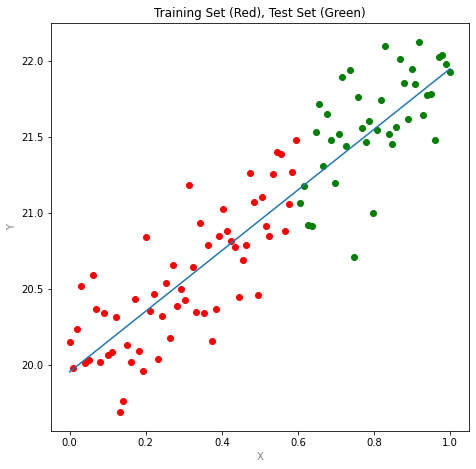

In [12]:



# Find optimal params
trainingSet = readDataSet('lab_1_train.csv')
inputParams = {
    "tolerance": 1e-8,
    "dataSet": trainingSet,
    "learningRate": 0.01
}
minParams = calculateMinParamsGradientDescent(inputParams)
print(f"Optimal params b0: {minParams['b0']}, b1: {minParams['b1']}")



# Visualize
fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)

plt.xlabel('X', color='gray')
plt.ylabel('Y', color='gray')

trainingSet = readDataSet('lab_1_train.csv')
testSet = readDataSet('lab_1_test.csv')
result = {
    "x": [0, 1],
    "y": [regressionLine(minParams['b0'], minParams['b1'], 0), regressionLine(minParams['b0'], minParams['b1'], 1)]
}

plt.title('Training Set (Red), Test Set (Green)')
plt.plot(trainingSet["x"], trainingSet["y"], 'ro', 
         testSet["x"], testSet["y"], 'go',
         result["x"], result["y"]
        )
plt.show()